In [2]:
# regression is continuous
# logistic regression is different - it is used for classification

In [3]:
from keras.datasets import boston_housing
import numpy as np

# data, targets
# 404 training samples
# 102 testing samples
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
train_data

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [5]:
from keras import models
from keras import layers

# Number of layers depends on the size of the data. Too many layers can result in overfitting
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [11]:
# K-fold cross-validation

k = 4 # number of partitions
num_val_samples = len(train_data) // k
num_epochs = 80
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[: i * num_val_samples], 
                                       train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
                                           train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 19.2625 - mae: 2.9371


In [13]:
# calculate the mean for the number of epochs
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[4.458531618118286,
 3.3941929936408997,
 3.0837536454200745,
 2.8090009689331055,
 2.813463270664215,
 2.68290638923645,
 2.5917649269104004,
 2.683012843132019,
 2.639229118824005,
 2.45541650056839,
 2.5537346601486206,
 2.4989969730377197,
 2.529866337776184,
 2.5240634083747864,
 2.6699560284614563,
 2.4739776253700256,
 2.432852625846863,
 2.463369071483612,
 2.5722209215164185,
 2.4114720225334167,
 2.37446466088295,
 2.3323713541030884,
 2.383516252040863,
 2.386283278465271,
 2.512395918369293,
 2.4315925240516663,
 2.536659598350525,
 2.474357306957245,
 2.298715829849243,
 2.360780417919159,
 2.4307870864868164,
 2.350823074579239,
 2.39096862077713,
 2.4514657855033875,
 2.3774369657039642,
 2.4928686022758484,
 2.5252004265785217,
 2.2993665635585785,
 2.3777130842208862,
 2.418115198612213,
 2.4253779649734497,
 2.3695769608020782,
 2.4412962198257446,
 2.3899113833904266,
 2.434637427330017,
 2.450994372367859,
 2.3013972640037537,
 2.294922322034836,
 2.4905739426612854

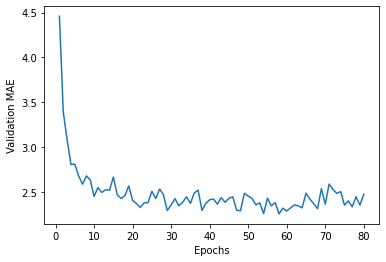

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()